In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [29]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [30]:
train.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [31]:
''' type 설명
GALAXY : 은하
QSO : 준 항성 물체 또는 퀘이사
REDDEN_STD : ?????????????????????????????
ROSAT_D : X-선 파장대에서 관측한 천체이지만, SDSS 망원경에서도 관측되는 천체
SERENDIPITY_BLUE : 항성 구역 외부에 놓인 천체
SERENDIPITY_DISTANT : 항성 구역 외부에 놓인 천체
SERENDIPITY_RED : 항성 구역 외부에 놓인 천체
SERENDIPITY_FIRST : 첫번째 관측에서 퀘이사로 분류되었지만, 이어진 관측에서는 더 흐릿한 천체
SERENDIPITY_MANUAL : 수동으로 관측된 천체
SKY : 빈 공간
SPECTROPHOTO_STD : ????????????????????????????
STAR_BHB : 수평거열성
STAR_BROWN_DWARF : 갈색왜성
STAR_CARBON : 왜성 또는 거대 탄소별
STAR_CATY_VAR : 격변변광성
STAR_PN : 성운의 중심별
STAR_RED_DWARF : 적색왜성
STAR_SUB_DWARF : 저광도 준왜성
STAR_WHITE_DWARF 백색왜성
참고 : http://skyserver.sdss.org/dr8/en/help/browser/enum.asp?n=PrimTarget
'''

' type 설명\nGALAXY : 은하\nQSO : 준 항성 물체 또는 퀘이사\nREDDEN_STD : ?????????????????????????????\nROSAT_D : X-선 파장대에서 관측한 천체이지만, SDSS 망원경에서도 관측되는 천체\nSERENDIPITY_BLUE : 항성 구역 외부에 놓인 천체\nSERENDIPITY_DISTANT : 항성 구역 외부에 놓인 천체\nSERENDIPITY_RED : 항성 구역 외부에 놓인 천체\nSERENDIPITY_FIRST : 첫번째 관측에서 퀘이사로 분류되었지만, 이어진 관측에서는 더 흐릿한 천체\nSERENDIPITY_MANUAL : 수동으로 관측된 천체\nSKY : 빈 공간\nSPECTROPHOTO_STD : ????????????????????????????\nSTAR_BHB : 수평거열성\nSTAR_BROWN_DWARF : 갈색왜성\nSTAR_CARBON : 왜성 또는 거대 탄소별\nSTAR_CATY_VAR : 격변변광성\nSTAR_PN : 성운의 중심별\nSTAR_RED_DWARF : 적색왜성\nSTAR_SUB_DWARF : 저광도 준왜성\nSTAR_WHITE_DWARF 백색왜성\n참고 : http://skyserver.sdss.org/dr8/en/help/browser/enum.asp?n=PrimTarget\n'

In [32]:
'''
fiberID : 천체를 관측할 때 사용된 광섬유의 식별번호 
'''

'\nfiberID : 천체를 관측할 때 사용된 광섬유의 식별번호 \n'

In [33]:
'''
psfMag : Point Spread Function, 천체를 한 점으로 가정하여 측정한 밝기
fiberMag : 천체를 3인치 지름의 광섬유로 관측할 때 측정한 밝기
petroMag : 천체의 위치와 거리에 상관없이 측정한 밝기(?)
modelMag : 천체 중심으로부터 특정거리에서 측정한 밝기(?)
'''

'\npsfMag : Point Spread Function, 천체를 한 점으로 가정하여 측정한 밝기\nfiberMag : 천체를 3인치 지름의 광섬유로 관측할 때 측정한 밝기\npetroMag : 천체의 위치와 거리에 상관없이 측정한 밝기\nmodelMag : 천체 중심으로부터 특정거리에서 측정한 밝기'

In [34]:
''' 파장대 및 길이
u : Ultraviolet(자외선) 380nm ~ 420nm
g : Green 490nm ~ 570nm
r : Red 630nm ~ 750nm
i : Near Infrared(근적외선) 780nm ~ 2500nm
z : Infrared (적외선) 630nm ~ 1,000,000nm == 1mm
'''

' 파장대 및 길이\nu : Ultraviolet(자외선) 380nm ~ 420nm\ng : Green 490nm ~ 570nm\nr : Red 630nm ~ 750nm\ni : Near Infrared(근적외선) 780nm ~ 2500nm\nz : Infrared (적외선) 630nm ~ 1,000,000nm == 1mm\n'

In [35]:
sorted(list(train['type'].unique()))

['GALAXY',
 'QSO',
 'REDDEN_STD',
 'ROSAT_D',
 'SERENDIPITY_BLUE',
 'SERENDIPITY_DISTANT',
 'SERENDIPITY_FIRST',
 'SERENDIPITY_MANUAL',
 'SERENDIPITY_RED',
 'SKY',
 'SPECTROPHOTO_STD',
 'STAR_BHB',
 'STAR_BROWN_DWARF',
 'STAR_CARBON',
 'STAR_CATY_VAR',
 'STAR_PN',
 'STAR_RED_DWARF',
 'STAR_SUB_DWARF',
 'STAR_WHITE_DWARF']

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
type_le = LabelEncoder()

In [38]:
type_le.fit(train.type)

LabelEncoder()

In [39]:
target_encoded = type_le.transform(train.type)

In [40]:
type_le.classes_

array(['GALAXY', 'QSO', 'REDDEN_STD', 'ROSAT_D', 'SERENDIPITY_BLUE',
       'SERENDIPITY_DISTANT', 'SERENDIPITY_FIRST', 'SERENDIPITY_MANUAL',
       'SERENDIPITY_RED', 'SKY', 'SPECTROPHOTO_STD', 'STAR_BHB',
       'STAR_BROWN_DWARF', 'STAR_CARBON', 'STAR_CATY_VAR', 'STAR_PN',
       'STAR_RED_DWARF', 'STAR_SUB_DWARF', 'STAR_WHITE_DWARF'],
      dtype=object)

In [60]:
train

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,...,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,199987,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,...,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,199988,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,...,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724
199989,199989,GALAXY,85,21.172003,20.561208,20.031754,19.793644,19.540471,21.704126,20.469748,...,18.880781,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854


In [42]:
target_encoded

array([ 1,  1,  1, ..., 16,  0,  1])

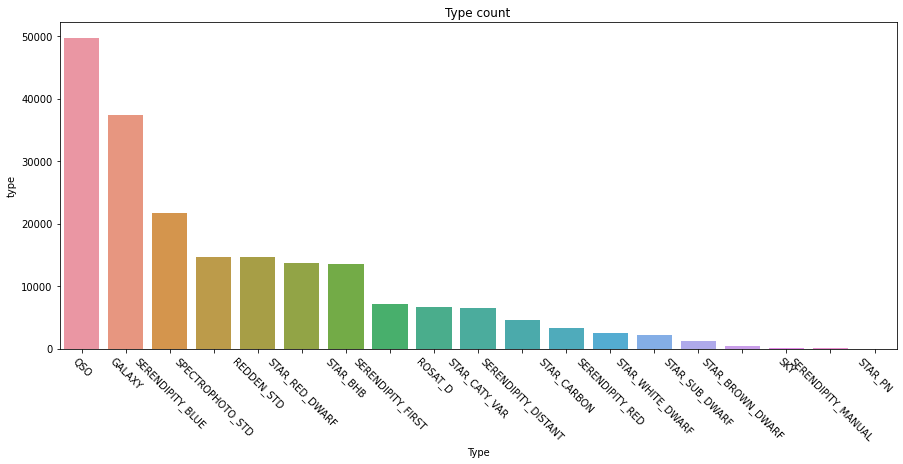

In [59]:
# type 개수 시각화
plt.figure(figsize=(15,6))
plt.title('Type count')
plt.xlabel('Type')
plt.ylabel('Count')
sns.barplot(x = train['type'].value_counts().index,
            y = train['type'].value_counts())
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# fiberID 가 640보다 큰 경우 모두 QSO로 분류됨
train[ train['fiberID'] > 640 ]['type'].value_counts()

# FiberID (천체를 관측할 때 사용된 광섬유의 식별번호)

In [ ]:
train[train['fiberID'] > 640 ]['type'].value_counts()

In [55]:
def draw_types(n, filter_): # n : 상위 n 개 , filter_ : psf, fiberMag, petroMag
    labels = train.type.unique().tolist()[:n]
    columns = train.filter(regex = filter_).columns.tolist()
    colors = ['violet', 'green', 'red', 'cyan', 'yellow']
    waves = [column[-1:] for column in columns]

    fig, axes = plt.subplots(nrows = int(n/2)+1,
                             ncols = 2,
                             figsize = (10,n),
                             dpi=100)
    
    for i, label in enumerate(labels):
        for column, color, wave in zip(columns, colors, waves):
            # 이상치 제거
            q1 = train.loc[train['type'] == label, column].quantile(0.25)
            q3 = train.loc[train['type'] == label, column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)
            mask = (train.loc[train['type'] == label, column] >= lower_bound) & (train.loc[train['type'] == label, column] <= upper_bound)
            data = train.loc[train['type'] == label, column].loc[mask]

            sns.distplot(data,
                         hist = False,
                         color = color,
                         kde_kws = {'shade': True}, 
                         label = wave,
                         ax = axes.flat[i])

        axes.flat[i].set_title(label)
        axes.flat[i].set_xlabel('')
        axes.flat[i].grid(axis = 'x',
                          linestyle = '--')
        axes.flat[i].legend(frameon=True,
                            framealpha=1,
                            shadow=False, 
                            fancybox=False,
                            edgecolor='black')

    fig.tight_layout()
    plt.show()

In [56]:
print(n)

19


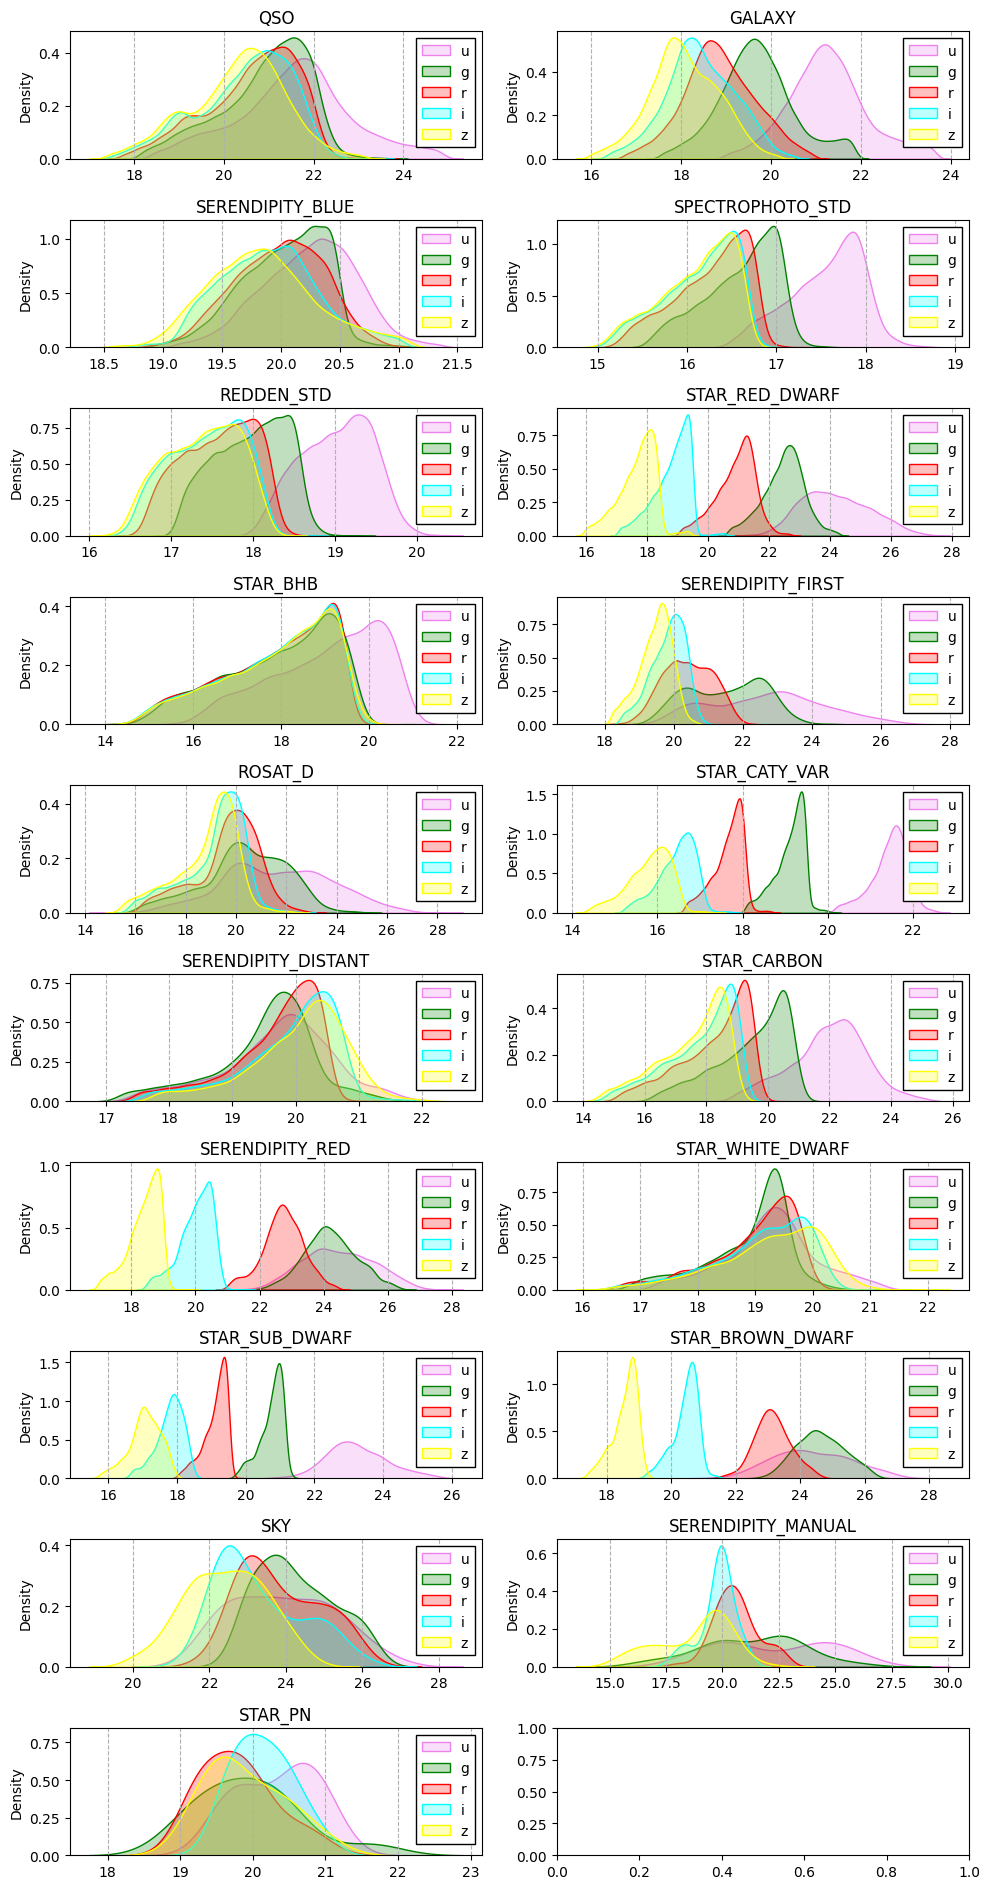

In [58]:
# type 상위 4개, psf 파장 시각화
n = len(train.type.unique().tolist())
draw_types(n, filter_='psf')

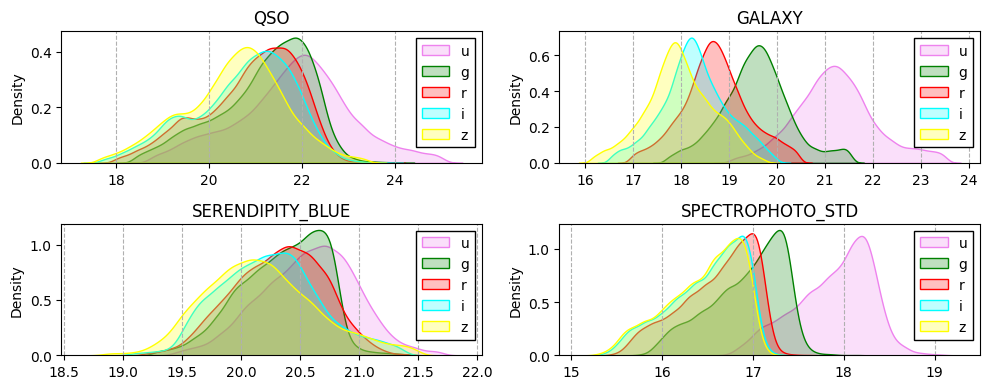

In [16]:
draw_types(n=4, filter_='fiberMag')

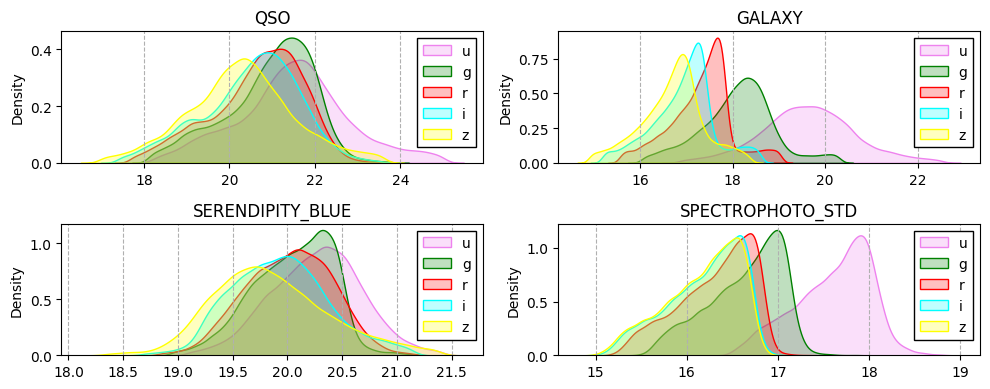

In [17]:
draw_types(n=4, filter_='petroMag')